В этом ноутбуке мы проведем небольшой анализ данных, чтобы понять, как правильно преобразовать датасет в дальнейшем.

Сначала пропишем импорт библиотек:

In [94]:
# Импорты
import os
import yaml

from collections import Counter

from PIL import Image

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sbn

In [95]:
# Пути к датасету

# Читаем конфиг
with open(r"..\config\main.yaml") as file:
    cfg = yaml.safe_load(file)

base_path = os.path.abspath("..").replace("\\", "/")
image_path = base_path + "/" + cfg["data"]["raw_img"]
data_path = "../" + cfg["data"]["raw_csv"]

# Первичный осмотр данных

Сначала загрузим датасет и проанализируем базовую информацию о нем:

In [96]:
# Загрузка датасета
df = pd.read_csv(data_path)

Выведем несколько примеров:

In [97]:
# Вывод нескольких строк из датасета
df.head(5)

,set_id,gender,age,country
0,0,FEMALE,36,RU
1,1,FEMALE,37,RU
2,2,FEMALE,36,RU
3,3,MALE,29,RU
4,4,FEMALE,43,RU


Проверим пропуски и дубликаты:

In [98]:
# Проверка дубликатов и пропусков
print(f"Дубликатов: {df.duplicated().sum()}")
print(f"Пропусков: {df.isna().sum().sum()}")

Дубликатов: 0
Пропусков: 0


Выведем общую информацию:

In [99]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   set_id   19 non-null     int64
 1   gender   19 non-null     str  
 2   age      19 non-null     int64
 3   country  19 non-null     str  
dtypes: int64(2), str(2)
memory usage: 736.0 bytes


# Графики распределения переменных

Теперь проанализируем распределение значений в каждой переменной.

Начнем с категориальных переменных Gender и Country:

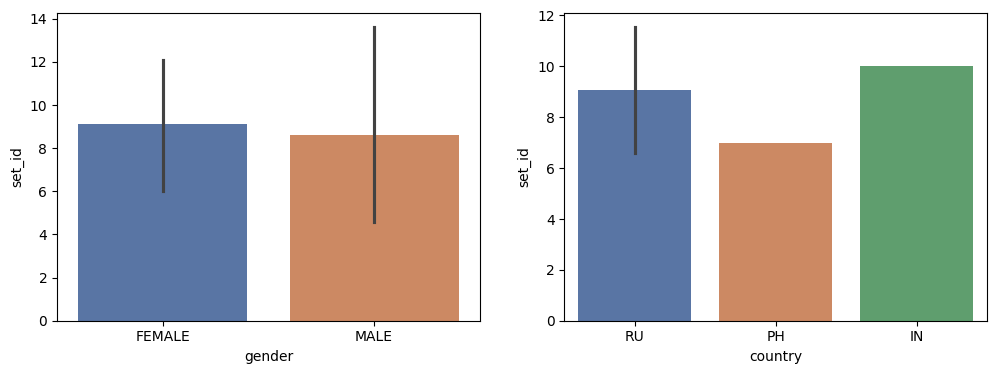

In [100]:
# Распределение Gender и Country

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sbn.barplot(data =df, x="gender", y="set_id", palette="deep", hue="gender")
plt.subplot(1, 2, 2)
sbn.barplot(data =df, x="country", y="set_id", palette="deep", hue="country")
plt.show()

Теперь посмотрим распределение возраста:

<Axes: xlabel='age', ylabel='Count'>

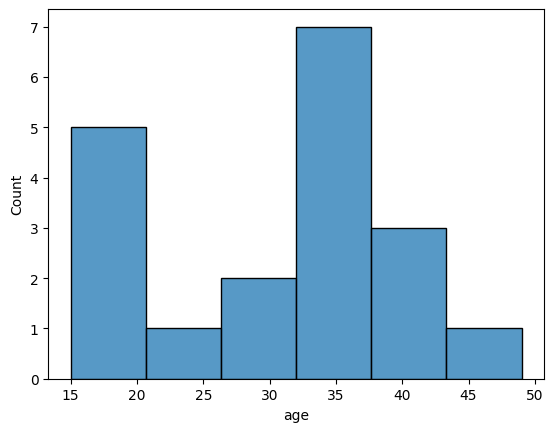

In [101]:
# Распределение возраста
sbn.histplot(x="age", data=df)

Осталось посмотреть распределение целевой переменной - эмоции, но для этого надо сначала подсчитать количество фото, соответсвующих каждому классу:

In [104]:
# Подсчет размеров каждого класса

class_counter = Counter() # Класс для подсчета уникальных меток

# Цикл для прохода по всем папкам людей из датасета
for human_path in os.listdir(image_path):

    class_list = [] # Список меток внутри одной папки человека

    # Проход по всем фото внутри папки 1 человека
    for emotion_file in os.listdir(f"{image_path}\{human_path}"):
        class_list.append(emotion_file.split(".")[0]) # Добавление всех меток

    class_counter.update(class_list) # Обновление класса для подсчета уникальных меток

Теперь мы можем вывести распределение классов:

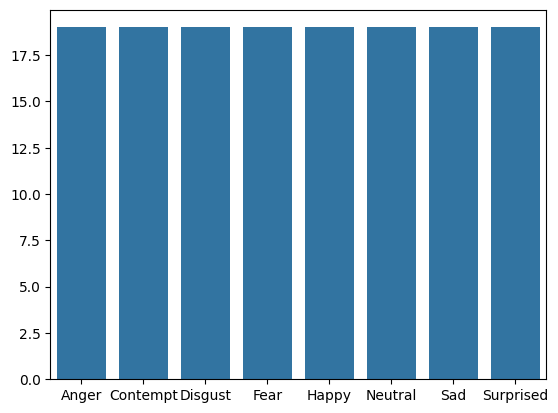

In [105]:
# График распределения классов
sbn.barplot(x=class_counter.keys(), y=class_counter.values())
plt.show()

# Технические характеристики

Теперь посмотрим, есть ли у картинок различия в размерах, цветовых схемах и расширениях.

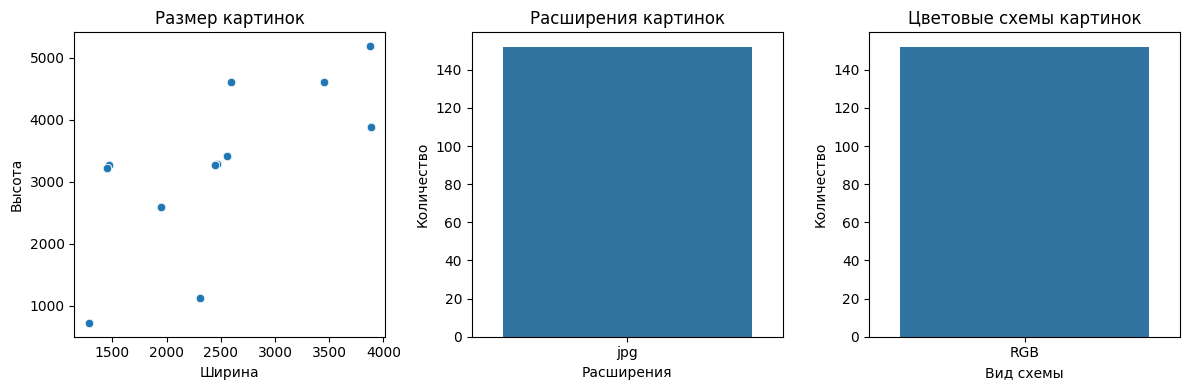

In [71]:
# Вывод технических характеристик датасета

width_list = [] # Список ширины всех картинок
height_list = [] # Список высоты всех картинок
extension_list = [] # Список расширений всех картинок
mode_list = [] # Список цтовых схем всех картинок

# Цикл с проходом по папкам всех людей
for human_path in os.listdir(image_path):

    # Проход по всем фото внутри папки 1 человека
    for emotion_file in os.listdir(f"{image_path}\{human_path}"):
        
        # Открываем картинку
        img = Image.open(f"{image_path}\{human_path}\{emotion_file}")

        # Вносим инфу
        width_list.append(img.size[0])
        height_list.append(img.size[1])
        extension_list.append(emotion_file.split(".")[1])
        mode_list.append(img.mode)

# Вывод графиков

plt.figure(figsize=(12, 4)) # Натсройка размеров

# Вывод диаграммы рассеяния с размерами картинок
plt.subplot(1, 3, 1)
sbn.scatterplot(x=width_list, y = height_list)
plt.xlabel("Ширина")
plt.ylabel("Высота")
plt.title("Размер картинок")

# Вывод cтолбчатой диаграммы расширений картинок
plt.subplot(1, 3, 2)
extension_counter = Counter(extension_list)
sbn.barplot(x = extension_counter.keys(), y = extension_counter.values())
plt.xlabel("Расширения")
plt.ylabel("Количество")
plt.title("Расширения картинок")

# Вывод cтолбчатой диаграммы цветовых схем картинок
plt.subplot(1, 3, 3)
mode_counter = Counter(mode_list)
sbn.barplot(x = mode_counter.keys(), y = mode_counter.values())
plt.xlabel("Вид схемы")
plt.ylabel("Количество")
plt.title("Цветовые схемы картинок")


plt.tight_layout()
plt.show()

# Вывод картинок

Для наглядности выведем 1 человека из датасета, который показывает все возможные эмоции:

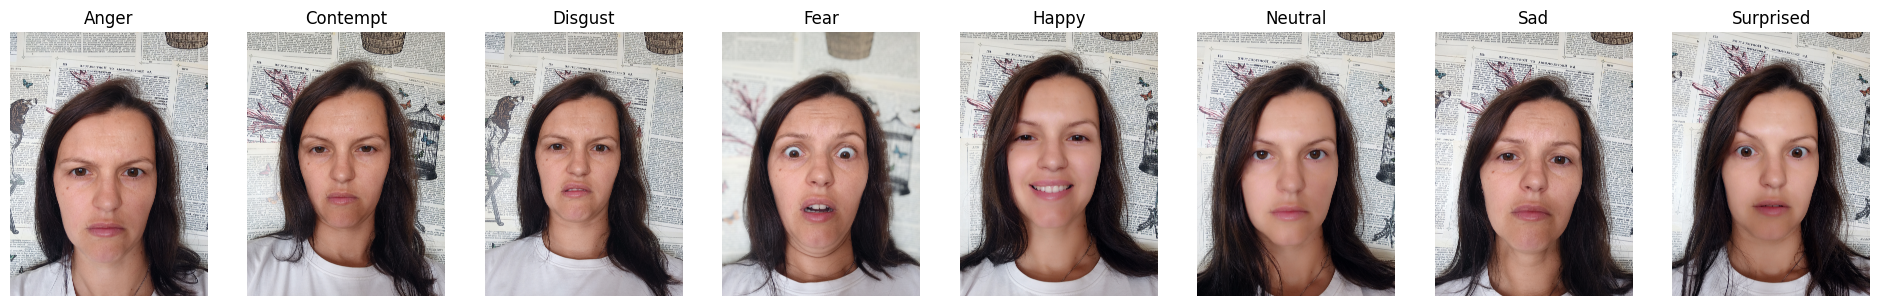

In [72]:
# Вывод датасета

plt.figure(figsize=(24, 12))

# Цикл с проходом по папкам всех людей
for i, human_path in enumerate(os.listdir(image_path)):

    # Проход по всем фото внутри папки 1 человека
    for j, emotion_file in enumerate(os.listdir(f"{image_path}\{human_path}")):
        # Открывваем картинку
        img = Image.open(f"{image_path}\{human_path}\{emotion_file}")

        # Выводимм ее
        plt.subplot(1, 8, i+j+1)
        plt.title(emotion_file.split(".")[0])
        plt.axis("off")
        plt.imshow(img)

    break

plt.show()

# Выводы и гипотезы

Выводы:
- В датасете отсутствуют пропуски и дубликаты;
- Присутствуют категориальные переменные типа str, которые будет необходимо закодировать;
- Значения всех параметров, за исключением возраста, распределены равномерно;
- У изображений различные размеры, но все они формата JPG и представлены в RGB;
- Изображения визуально корректны.

Гипотезы:
- Переменные пола, возраста и национальности не важны, поэтому их можно вырезать.